<a href="https://colab.research.google.com/github/SamreenNaz/ChronicKidney_Prediction_Models.git./blob/main/confusion_matrixfig2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

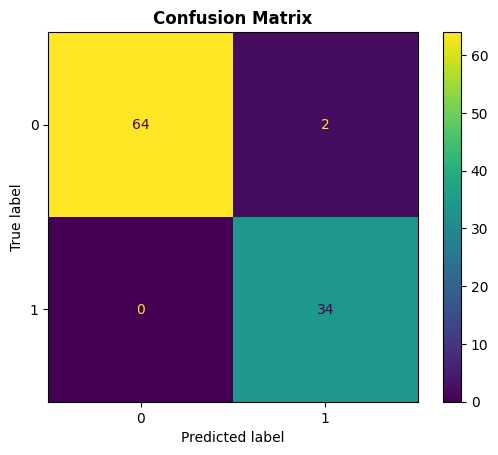

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load the cleaned dataset
df = pd.read_csv("final_cleaned_400_patient_data.csv")

# Step 2: Drop missing values from target column
df = df.dropna(subset=['classification'])

# Step 3: Separate classes
not_ckd = df[df['classification'] == 0]
ckd = df[df['classification'] == 1]

# Step 4: Manually create test set: 66 not-ckd + 34 ckd
not_ckd_test = not_ckd.sample(n=66, random_state=42)
ckd_test = ckd.sample(n=34, random_state=42)
test_df = pd.concat([not_ckd_test, ckd_test])

# Step 5: Create training set from remaining data
train_df = df.drop(test_df.index)

# Step 6: Prepare features and labels
X_train = train_df.drop(columns=['classification', 'id'])
y_train = train_df['classification']
X_test = test_df.drop(columns=['classification', 'id'])
y_test = test_df['classification']

# Step 7: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=6, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict and display confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix", fontweight='bold')
plt.show()
